<h1>Linear Regression (1)</h1>

In this notebook, we will apply linear regression on a synthetically generated data to discuss:<br/>
1. The assumptions on data for appropriatedness of applying linear regression algorithm, and how to verify whether these assumptions are met.<br/>
2. The evaluation metrics and their importance in gauging the model's performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a random array X using randn() from numpy package, where randn() ~ N(0, 1)
# task: look at X's distribution (by drawing it), and also look at y's distribution
# Let's say this is our feature (X)
X = np.random.randn(1000)

# Then we will create another array y = X^2
# say, this will be our target variable (y)
y = X**2

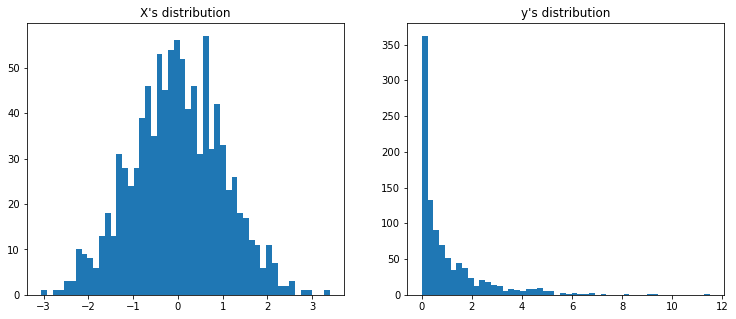

In [3]:
_ = plt.figure(figsize=(12.5, 5))
ax1 = plt.subplot(121)
_ = ax1.hist(X, 50)
_ = ax1.set_title("X's distribution")

ax2 = plt.subplot(122)
_ = ax2.hist(y, 50)
_ = ax2.set_title("y's distribution")

plt.show()

X's mean: -0.00672, and standard deviation: 1.01291
y's mean (directly from y data): 1.02604, and mean (computed from X data): 1.02604


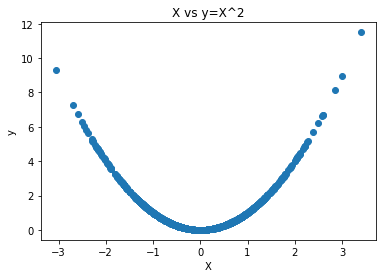

In [4]:
# this is just a hypothetical dataset with features (X) and target (y)
# because they offer a lot of nice properties and we also know the pattern (trend)
# i.,e., if we know a feature X we know the target f(X) = X^2
# Also, we even know the mean E(y) from the feature set (x): E(y) = E(X^2) = var(X) + {E(x)}^2
# Our machine learning (ML) algorithm's task is known beforehand, i.e., to approximate the function f(X) = X^2

print("X's mean: {:.5f}, and standard deviation: {:.5f}".format(X.mean(), X.std())) # you should see that mean = 0 and std = 1 (approx)
print("y's mean (directly from y data): {:.5f}, and mean (computed from X data): {:.5f}".format(y.mean(), X.std()**2+X.mean()**2))  # the calcuations should give equal value
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y=X^2')
plt.show()

<h2>Tasks</h2>

1. Vary the arugment (input) of np.random.randn function of cell 2, and execute them upto cell 3 to view X's distribution - try it with a large number (10000), and also with a small number (10).<br/>
2. Comments on Y's distribution as well

<h1>Modelling</h1>

In [5]:
# defining 3 models: perfect, average and linearregression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 80:20 separation for training/testing, since the data is generated randomly in the first place
# we are not splitting it randomly again, just slicing the array for the separation
# remember to randomise in usual scenarios when we do not have this random data generation knowledge
ind = int(len(X) * 0.8)

# fitting the linear regression model
lr = lr.fit(X[:ind].reshape(-1, 1), y[:ind])

# average model: just compute the average of the training set
avg = y[:ind].sum() / ind

# perfect model: we know the polynomial fit, y= X^2

# the following three functions accepts an array (arr), and returns the arr^2 [square of every element]
def model_perfect(arr):
    return arr**2

# returns the average for every element of the arr
def model_average(arr):
    return [avg]*len(arr)

# returns the linear regression prediction
def model_linearregression(arr):
    return lr.predict(arr)

In [6]:
# predictions on the training set, X[:ind]
result_lr_train = model_linearregression(X[:ind].reshape(-1,1))
result_pft_train = model_perfect(X[:ind].reshape(-1,1))
result_avg_train = model_average(X[:ind].reshape(-1,1))

# predictions on the testing set, X[ind:]
result_lr_test = model_linearregression(X[ind:].reshape(-1,1))
result_pft_test = model_perfect(X[ind:].reshape(-1,1))
result_avg_test = model_average(X[ind:].reshape(-1,1))

print('Model parameters:\n***************\nWeights(w): {}\nIntercept(w0): {}'.format(lr.coef_, lr.intercept_))

Model parameters:
***************
Weights(w): [0.01919525]
Intercept(w0): 1.0548330665520942


<h1>Evaluation</h1>

In [7]:
# evaluation metrics: mse [mean squared error], mae [mean absolute error] and R^2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('ALGORITHM: AVERAGE')
print('**********************')
print('Mean Absolute Error: {} (Training), {} (Testing)'.format(mean_absolute_error(y[:ind], result_avg_train), mean_absolute_error(y[ind:],result_avg_test)))
print('Root Mean Squared Error: {} (Training), {} (Testing)'.format(np.sqrt(mean_squared_error(y[:ind],result_avg_train)), np.sqrt(mean_squared_error(y[ind:],result_avg_test))))
print('R2 Score: {} (Training), {} (Testing)'.format(r2_score(y[:ind],result_avg_train), r2_score(y[ind:],result_avg_test)))

print('\nALGORITHM: PERFECT')
print('**********************')
print('Mean Absolute Error: {} (Training), {} (Testing)'.format(mean_absolute_error(y[:ind], result_pft_train), mean_absolute_error(y[ind:],result_pft_test)))
print('Root Mean Squared Error: {} (Training), {} (Testing)'.format(np.sqrt(mean_squared_error(y[:ind],result_pft_train)), np.sqrt(mean_squared_error(y[ind:],result_pft_test))))
print('R2 Score: {} (Training), {} (Testing)'.format(r2_score(y[:ind],result_pft_train), r2_score(y[ind:],result_pft_test)))

print('\nALGORITHM: LINEAR REGRESSION')
print('*********************************')
print('Mean Absolute Error: {} (Training), {} (Testing)'.format(mean_absolute_error(y[:ind], result_lr_train), mean_absolute_error(y[ind:],result_lr_test)))
print('Root Mean Squared Error: {} (Training), {} (Testing)'.format(np.sqrt(mean_squared_error(y[:ind],result_lr_train)), np.sqrt(mean_squared_error(y[ind:],result_lr_test))))
print('R2 Score: {} (Training), {} (Testing)'.format(r2_score(y[:ind],result_lr_train), r2_score(y[ind:],result_lr_test)))

ALGORITHM: AVERAGE
**********************
Mean Absolute Error: 1.0179475725932519 (Training), 0.9183777934381212 (Testing)
Root Mean Squared Error: 1.4418607660860963 (Training), 1.1771113363994883 (Testing)
R2 Score: 0.0 (Training), -0.014922044494877218 (Testing)

ALGORITHM: PERFECT
**********************
Mean Absolute Error: 0.0 (Training), 0.0 (Testing)
Root Mean Squared Error: 0.0 (Training), 0.0 (Testing)
R2 Score: 1.0 (Training), 1.0 (Testing)

ALGORITHM: LINEAR REGRESSION
*********************************
Mean Absolute Error: 1.0185837734363146 (Training), 0.9190442922390133 (Testing)
Root Mean Squared Error: 1.441726034302311 (Training), 1.1787893164082865 (Testing)
R2 Score: 0.00018687725206700811 (Training), -0.017817663083901314 (Testing)


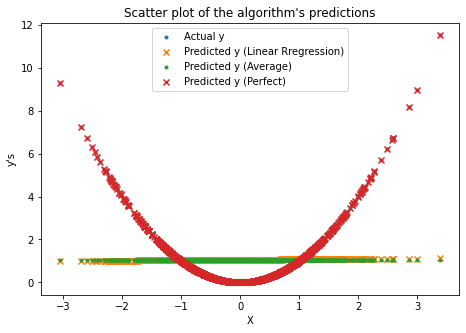

In [8]:
# drawing the four graphs: predicted outputs of the three models + the output
_ = plt.figure(figsize=(7.5, 5))
ax1 = plt.subplot(111)
_ = ax1.scatter(X, y, marker='.')
_ = ax1.scatter(X, np.concatenate((result_lr_train, result_lr_test), axis=0), marker='x')
_ = ax1.scatter(X, np.concatenate((result_avg_train, result_avg_test), axis=0), marker='.')
_ = ax1.scatter(X, np.concatenate((result_pft_train, result_pft_test), axis=0), marker='x')
_ = ax1.legend(['Actual y','Predicted y (Linear Rregression)','Predicted y (Average)','Predicted y (Perfect)'])
_ = ax1.set_title("Scatter plot of the algorithm's predictions")
_ = ax1.set_xlabel('X')
_=ax1.set_ylabel("y's")

plt.show()

<h1>Conclusions</h1>
???

<h1>Exploratory Data Analysis (EDA)</h1>
This step actually should go before modelling/predictons (inference) for any machine learning (ML) use-case. It is a fundamental step for any ML problems. For example, just looking at the figure X vs y [in cell 4], we can perceive weak linear relationship between them. Linear Regression may not be useful in the first place. For application of linear regression, there are a number of assumptions that the data must satisfy:<br/>
1. Linearity<br/>
2. Homoscedasticity<br/>
3. Independence<br/>
4. Normality

Pearson Coefficient (X, y): -0.0017567552909749436


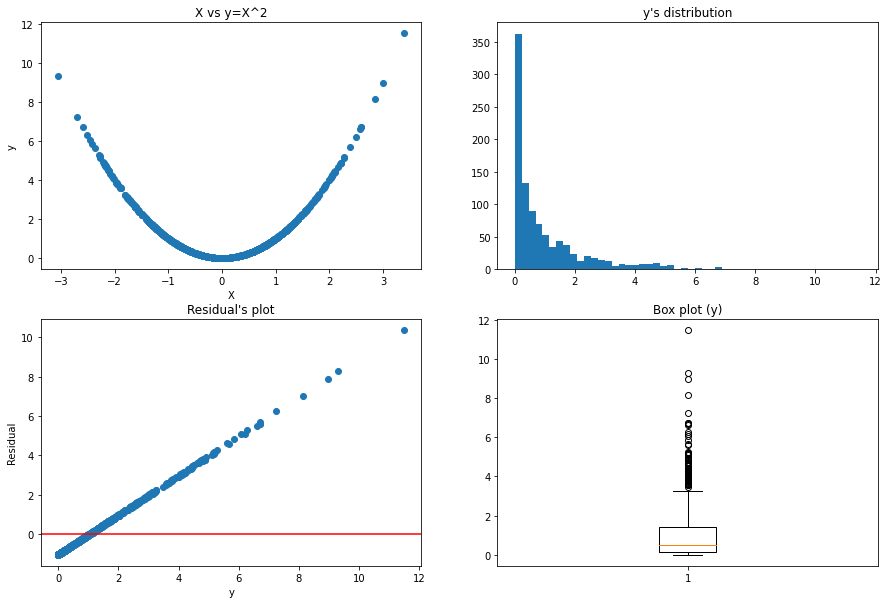

In [9]:
# linearity:
# you can look at the scatter plot of X vs y to have some ideas: in our case, poor linear fit
# also, a weak correlation (e.g., computing pearson's coefficient) value is always a red flag for linearity condition
print('Pearson Coefficient (X, y): {}'.format(np.corrcoef(X, y)[0, 1])) # without the array index [0, 1], will give a two dimensional correlation matrix

# homoscedasticity
#normally distributed errors between actual and predicted values (i.e., the residuals of the regression)


# independence:
# in this case, we actually know the observations are independent - the way the data is generated (np.random.randn)

# normality:
# look at the distribution of Y for a sample dataset (X): looking at the graph [cell 3], this does not seem to apply (Chi-square distribution) - right skewed
# also, drawing a box plot is always a good idea to check for this condition (it also gives an idea bout outliers)


# drawing some related fitures below for EDA: some of them were drawn before
_ = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(221)
_ = ax1.scatter(X, y)
_ = ax1.set_title('X vs y=X^2')
_ = ax1.set_xlabel('X')
_ = ax1.set_ylabel('y')

ax2 = plt.subplot(222)
_ = ax2.hist(y, 50)
_ = ax2.set_title("y's distribution")

ax3 = plt.subplot(223)
_ = ax3.scatter(y, y - np.concatenate((result_lr_train, result_lr_test), axis=0))
_ = ax3.axhline(y=0, color='r', linestyle='-')
_ = ax3.set_title("Residual's plot")
_ = ax3.set_xlabel('y')
_ = ax3.set_ylabel('Residual')

ax4 = plt.subplot(224)
_ = ax4.boxplot(y)
_ = ax4.set_title("Box plot (y)")

plt.show()

<h1>Verdict???</h1>